In [ ]:
# !pip install --upgrade scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler, MaxAbsScaler, TargetEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, recall_score, precision_score

In [ ]:
sklearn.__version__

'1.2.2'

In [ ]:
df_org = pd.read_csv('/content/drive/MyDrive/ASAC3기_이상탐지/Code/8주차/작업중/tmp.csv')

In [ ]:
df = df_org.copy()

In [ ]:
df.head(2)

,machine_id,time,ckey,date,hour,connect_avg,connect_max,in_handover_rate,out_handover_rate,inter_handover_rate,...,is_night,is_commute,day_sin,day_cos,dayofweek_sin,dayofweek_cos,hour_sin,hour_cos,is_holiday,station
0,MA1074_4,2021-09-02 00:00:00,MA1074_4_20210902_0,20210902.0,0,-0.016140,0.058841,-0.003187,0.000000,0.000000,...,1,0,0.394356,0.918958,0.433884,-0.900969,0.000000,1.000000,0,MA1074
1,MA1074_4,2021-09-02 01:00:00,MA1074_4_20210902_1,20210902.0,1,-0.040375,-0.039221,-0.381298,0.004795,0.006286,...,1,0,0.394356,0.918958,0.433884,-0.900969,0.258819,0.965926,0,MA1074


In [ ]:
len(df.columns)

32

In [ ]:
categorical_columns = ['station', 'machine_id', 'year', 'month']
numerical_columns = ['connect_avg', 'connect_max', 'in_handover_rate', 'out_handover_rate', 'inter_handover_rate', 'lower_prb', 'upper_prb', 'reconfig_rate', 'lower_bler', 'upper_bler', 'tot_et']
len(categorical_columns), len(numerical_columns)

(4, 11)

In [ ]:
# preprocessor = make_column_transformer(
#     (StandardScaler(), numerical_columns),
#     (TargetEncoder(), categorical_columns),
#     remainder='passthrough'
# )
# sc = StandardScaler()
# te = OrdinalEncoder()

In [ ]:
# df[numerical_columns] = sc.fit_transform(df[numerical_columns])

In [ ]:
# df[categorical_columns] = te.fit_transform(df[categorical_columns])

In [ ]:
# te_station = TargetEncoder()
# df[['station']] = te_station.fit_transform(df[['station']], df['y'])

# te_machine_id = TargetEncoder()
# df[['machine_id']] = te_machine_id.fit_transform(df[['machine_id']], df['y'])

In [ ]:
best_params = {'criterion': 'gini',
                'max_depth': 50,
                'max_features': 'sqrt',
                'max_samples': 0.9,
                'min_samples_leaf': 2,
                'min_samples_split': 2,
                'n_estimators': 100}

In [ ]:
# rf_opt = RandomForestClassifier(**best_params)

In [ ]:
# machine_list = df['machine_id'].unique()
# df_feature_imp = pd.DataFrame()

# for idx, machine in enumerate(machine_list):
#     tmp = df.loc[df['machine_id'] == machine]
#     X = tmp.drop(['ckey', 'date', 'time', 'y'], axis=1)
#     y = tmp['y']
#     rf_opt.fit(X, y)
#     # print(y.value_counts())
#     # print(f1_score(y, rf_opt.predict(X)))
#     # print(rf_opt.feature_importances_)
#     # print(rf_opt.feature_names_in_)
#     df_imp = pd.DataFrame({'machine_num' : [machine]*len(rf_opt.feature_names_in_),
#                            'feature' : rf_opt.feature_names_in_,
#                            'importance' : rf_opt.feature_importances_})
#     df_feature_imp = pd.concat([df_feature_imp, df_imp])

In [ ]:
# df_feature_imp

In [ ]:
# trans = pd.DataFrame({'machine_id' : df_org['machine_id'].unique(),
#               'machine_num' : machine_list})
# trans = pd.merge(df_feature_imp, trans, on='machine_num')

In [ ]:
# final1 = trans[['machine_id', 'feature', 'importance']]
# final1.to_csv('28_feature_imp_by_machine_id.csv', index=False)

In [ ]:
# 51 * 28

In [ ]:
# final2 = final1[final1['feature'].apply(lambda x : x in numerical_columns)].reset_index(drop=True)

In [ ]:
# final2.to_csv('11_feature_imp_by_machine_id.csv', index=False)

# zscore 그림

In [ ]:
df_final = pd.read_csv('/content/drive/MyDrive/ASAC3기_이상탐지/Code/8주차/작업중/final_data_50.csv')

In [ ]:
df_final['machine_id'].unique()

array(['MA1074_4', 'MA1084_11', 'MA1116_1', 'MA1184_4', 'MA1229_4',
       'MA1236_1', 'MA1266_5', 'MA1279_1', 'MA1279_11', 'MA1310_1',
       'MA1312_11', 'MA1313_1', 'MA1321_2', 'MA1322_4', 'MA1340_5',
       'MA1341_9', 'MA1353_42', 'MA1355_0', 'MA1407_2', 'MA1460_7',
       'MA1550_7', 'MA1563_2', 'MA1563_7', 'MA1584_1', 'MA1651_7',
       'MA1704_5', 'MA1704_7', 'MA1713_31', 'MA1730_4', 'MA1738_5',
       'MA1797_1', 'MA1803_1', 'MA1831_4', 'MA1890_8', 'MA1891_1',
       'MA1908_8', 'MA1932_1', 'MA1955_5', 'MA2017_11', 'MA2030_7',
       'MA2052_1', 'MA2111_47', 'MA2239_3', 'MA2354_2', 'MA2443_4',
       'MA2467_5', 'MA2488_4', 'MA2490_7', 'MA2523_8', 'MA2559_37',
       'MA2561_18'], dtype=object)

In [ ]:
df_final['time'] = pd.to_datetime(df_final['data'] + '-' + df_final['hour'].astype(str), format='%Y-%m-%d-%H')

In [ ]:
df_1074_4 = df_final[df_final['machine_id'] == 'MA1730_4']

In [ ]:
df_final.resample('H', on ='time')['in_handover_rate'].mean()

time
2021-09-02 00:00:00    9.627696e+01
2021-09-02 01:00:00    9.570930e+01
2021-09-02 02:00:00    9.616793e+01
2021-09-02 03:00:00    9.549703e+01
2021-09-02 04:00:00    9.443666e+01
                           ...     
2021-10-31 19:00:00    8.240389e+06
2021-10-31 20:00:00    8.282804e+06
2021-10-31 21:00:00    8.325366e+06
2021-10-31 22:00:00    8.368081e+06
2021-10-31 23:00:00    8.410953e+06
Freq: H, Name: in_handover_rate, Length: 1440, dtype: float64

In [ ]:
df_1074_4['Result'] = np.where(df_1074_4['zscore'] != 0, 'Anomaly', 'Normal')

<ipython-input-56-a829ff60b0a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1074_4['Result'] = np.where(df_1074_4['zscore'] != 0, 'Anomaly', 'Normal')


In [ ]:
upper_prb_time_mean = df_1074_4['upper_prb'].mean()
upper_prb_time_std = df_1074_4['upper_prb'].std()

upper_prb_time_ucl2 = upper_prb_time_mean + 2 * upper_prb_time_std
upper_prb_time_lcl2 = upper_prb_time_mean - 2 * upper_prb_time_std
print('UCL(95%) : {}, LCL(95%) : {}'.format(upper_prb_time_ucl2,upper_prb_time_lcl2))

in_handover_rate_time_mean = df_1074_4['in_handover_rate'].mean()
in_handover_rate_time_std = df_1074_4['in_handover_rate'].std()

in_handover_rate_time_ucl2 = in_handover_rate_time_mean + 2 * in_handover_rate_time_std
in_handover_rate_time_lcl2 = in_handover_rate_time_mean - 2 * in_handover_rate_time_std
print('UCL(95%) : {}, LCL(95%) : {}'.format(in_handover_rate_time_ucl2,in_handover_rate_time_lcl2))

reconfig_rate_time_mean = df_1074_4['reconfig_rate'].mean()
reconfig_rate_time_std = df_1074_4['reconfig_rate'].std()

reconfig_rate_time_ucl2 = reconfig_rate_time_mean + 2 * reconfig_rate_time_std
reconfig_rate_time_lcl2 = reconfig_rate_time_mean - 2 * reconfig_rate_time_std
print('UCL(95%) : {}, LCL(95%) : {}'.format(reconfig_rate_time_ucl2,reconfig_rate_time_lcl2))

UCL(95%) : 122.34945630504612, LCL(95%) : 31.25191428197092
UCL(95%) : 116.32032989613134, LCL(95%) : 71.58724390197798
UCL(95%) : 100.84695346726454, LCL(95%) : 99.838067979052


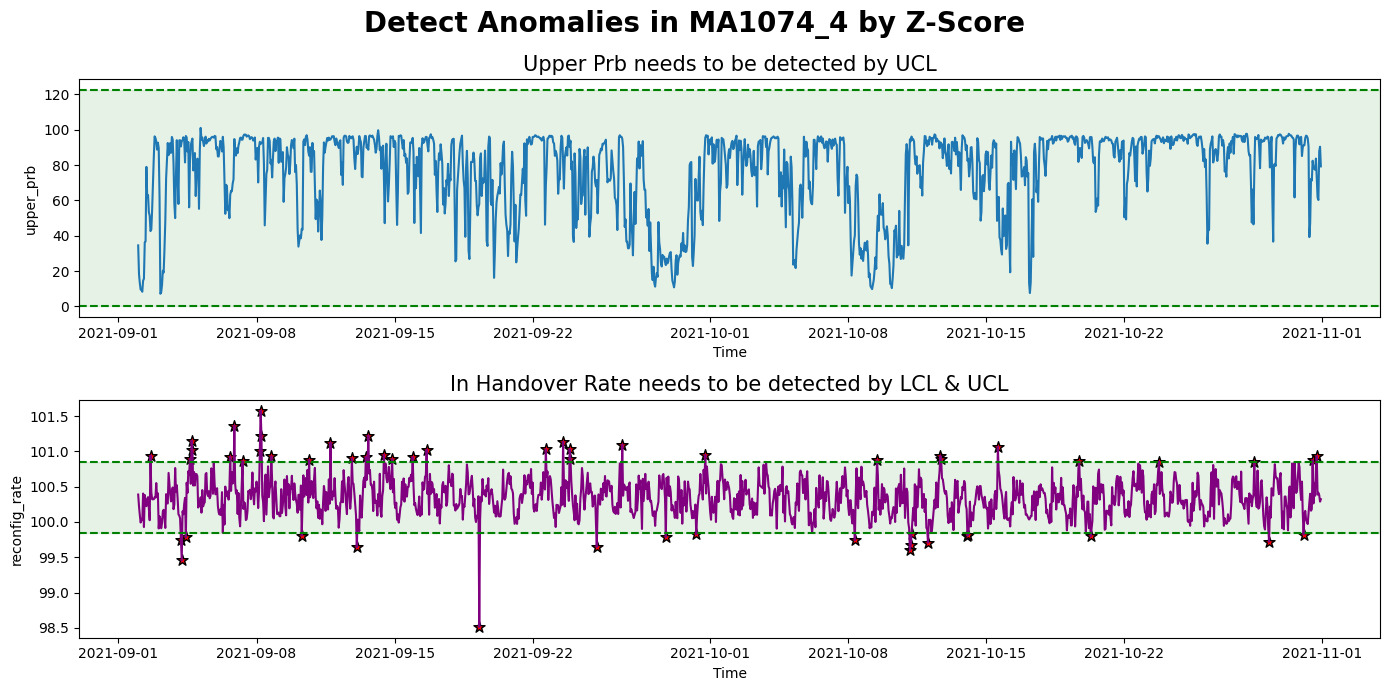

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(14,7))

plt.suptitle('Detect Anomalies in MA1074_4 by Z-Score', fontsize=20, fontweight='semibold')
### 95% ###
axs[0].plot(df_1074_4['time'], df_1074_4['upper_prb'])
axs[0].set_ylabel('upper_prb')
axs[0].set_xlabel('Time')

upper_prb_anomalies_95 = df_1074_4.loc[(df_1074_4['upper_prb'] > upper_prb_time_ucl2), ['time', 'upper_prb']]

for idx, (time, rate) in upper_prb_anomalies_95.iterrows():
    axs[0].scatter(pd.Timestamp(time), rate, marker='*', edgecolor='black', color='red', s=70)

axs[0].axhspan(0, upper_prb_time_ucl2, color='green', alpha=0.1)
axs[0].axhline(0, ls='--', color='green')
axs[0].axhline(upper_prb_time_ucl2, ls='--', color='green')

axs[0].set_title('Upper Prb needs to be detected by UCL', fontsize=15)

axs[1].plot(df_1074_4['time'], df_1074_4['reconfig_rate'], color='purple')
axs[1].set_ylabel('reconfig_rate')
axs[1].set_xlabel('Time')

reconfig_rate_anomalies_95 = df_1074_4.loc[(df_1074_4['reconfig_rate'] < reconfig_rate_time_lcl2) | (df_1074_4['reconfig_rate'] > reconfig_rate_time_ucl2), ['time', 'reconfig_rate']]

for idx, (time, rate) in reconfig_rate_anomalies_95.iterrows():
    axs[1].scatter(pd.Timestamp(time), rate, marker='*', edgecolor='black', color='red', s=70)

axs[1].axhspan(reconfig_rate_time_lcl2, reconfig_rate_time_ucl2, color='green', alpha=0.1)
axs[1].axhline(reconfig_rate_time_ucl2, ls='--', color='green')
axs[1].axhline(reconfig_rate_time_lcl2, ls='--', color='green')

axs[1].set_title('In Handover Rate needs to be detected by LCL & UCL', fontsize=15)
plt.tight_layout()

# Isolation Forest 그림

<Axes: >

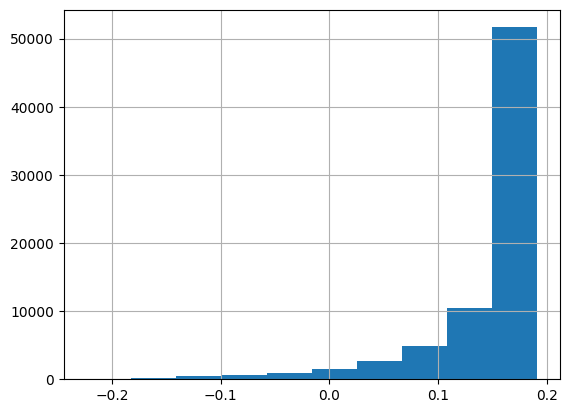

In [ ]:
df_final['isolation_scores'].hist()

<Axes: >

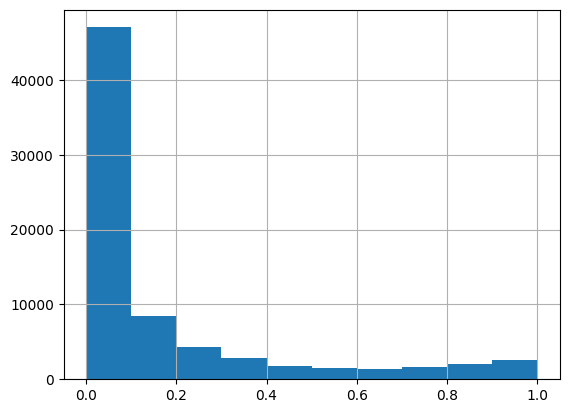

In [ ]:
df_final['predict_prob'].hist()

<Axes: >

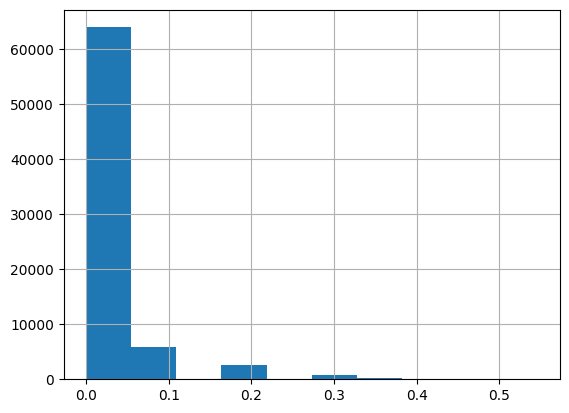

In [ ]:
df_final['zscore'].hist()

In [ ]:
df_1074_4 = df_final[df_final['machine_id'] == 'MA1074_4']

# 6.Isolation Forest


In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
true_label = df_processed['y']

In [ ]:
clf = IsolationForest(n_estimators=500, random_state=0)
clf.fit(zscore_df)

In [ ]:
anomaly_score = -np.sort(clf.score_samples(zscore_df))

In [ ]:
anomaly_score

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(anomaly_score, bins=100)
plt.title("Histogram of Anomaly Score")
# sns.kdeplot(anomaly_score)
plt.show()

In [ ]:
i_forest_anomalies = np.where(clf.predict(zscore_df)==1, 0, 1)

In [ ]:
i_forest_anomalies

In [ ]:
print('Isolation Accuracy score :', accuracy_score(true_label, i_forest_anomalies).round(4))
print('Isolation F1 score :', f1_score(true_label, i_forest_anomalies).round(4))

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(14,7))

plt.suptitle('Detect Anomalies in MA1074_4 by Z-Score', fontsize=20, fontweight='semibold')
### 95% ###
axs[0].plot(df_1074_4['time'], df_1074_4['upper_prb'])
axs[0].set_ylabel('upper_prb')
axs[0].set_xlabel('Time')

upper_prb_anomalies_95 = df_1074_4.loc[(df_1074_4['upper_prb'] > upper_prb_time_ucl2), ['time', 'upper_prb']]

for idx, (time, rate) in upper_prb_anomalies_95.iterrows():
    axs[0].scatter(pd.Timestamp(time), rate, marker='*', edgecolor='black', color='red', s=70)

axs[0].axhspan(0, upper_prb_time_ucl2, color='green', alpha=0.1)
axs[0].axhline(0, ls='--', color='green')
axs[0].axhline(upper_prb_time_ucl2, ls='--', color='green')

axs[0].set_title('Upper Prb needs to be detected by UCL', fontsize=15)

axs[1].plot(df_1074_4['time'], df_1074_4['in_handover_rate'], color='orange')
axs[1].set_ylabel('in_handover_rate')
axs[1].set_xlabel('Time')

in_handover_rate_anomalies_95 = df_1074_4.loc[(df_1074_4['in_handover_rate'] < in_handover_rate_time_lcl2), ['time', 'in_handover_rate']]

for idx, (time, rate) in in_handover_rate_anomalies_95.iterrows():
    axs[1].scatter(pd.Timestamp(time), rate, marker='*', edgecolor='black', color='red', s=70)

axs[1].axhspan(in_handover_rate_time_lcl2, 100, color='green', alpha=0.1)
axs[1].axhline(100, ls='--', color='green')
axs[1].axhline(in_handover_rate_time_lcl2, ls='--', color='green')

axs[1].set_title('In Handover Rate needs to be detected by LCL', fontsize=15)
plt.tight_layout()